In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('processes_datasets.csv')

In [3]:
df

,JobID,SubmitTime,WaitTime,RunTime,NProcs,AverageCPUTimeUsed,Used Memory,ReqNProcs,ReqTime:,ReqMemory,...,JobStructureParams,UsedNetwork,UsedLocalDiskSpace,UsedResources,ReqPlatform,ReqNetwork,ReqLocalDiskSpace,ReqResources,VOID,ProjectID
0,1,1136070024,203761,138467,1,138371,98652,1,259200,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,2,1136070690,0,11,1,4,35848,1,259200,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,3,1136071207,117,201203,1,0,0,1,259200,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,4,1136071267,4406,196985,1,0,0,1,259200,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,5,1136071269,202516,19520,1,18731,522268,1,259200,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404171,404172,1167603618,2,56,1,18,0,1,259200,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
404172,404173,1167603624,1,57,1,17,61084,1,259200,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
404173,404174,1167603637,1,45,1,17,0,1,259200,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
404174,404175,1167603747,1,43,1,17,0,1,259200,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [4]:
df = df.iloc[0:, [1, 2, 3, 5, 6, 8]].copy()

In [5]:
df

,SubmitTime,WaitTime,RunTime,AverageCPUTimeUsed,Used Memory,ReqTime:
0,1136070024,203761,138467,138371,98652,259200
1,1136070690,0,11,4,35848,259200
2,1136071207,117,201203,0,0,259200
3,1136071267,4406,196985,0,0,259200
4,1136071269,202516,19520,18731,522268,259200
...,...,...,...,...,...,...
404171,1167603618,2,56,18,0,259200
404172,1167603624,1,57,17,61084,259200
404173,1167603637,1,45,17,0,259200
404174,1167603747,1,43,17,0,259200


In [6]:
df.corr()

,SubmitTime,WaitTime,RunTime,AverageCPUTimeUsed,Used Memory,ReqTime:
SubmitTime,1.000000,0.049792,0.055988,0.051565,0.078524,-0.116449
WaitTime,0.049792,1.000000,0.082618,0.094106,0.037051,0.001670
RunTime,0.055988,0.082618,1.000000,0.864234,0.419717,0.274379
AverageCPUTimeUsed,0.051565,0.094106,0.864234,1.000000,0.447703,0.290692
Used Memory,0.078524,0.037051,0.419717,0.447703,1.000000,0.244945
ReqTime:,-0.116449,0.001670,0.274379,0.290692,0.244945,1.000000


In [7]:
df.columns = ["submit_time", 'wait_time', 'run_time', 'avg_cpu_time_used', 'used_mem', 'req_time']

In [8]:
df

,submit_time,wait_time,run_time,avg_cpu_time_used,used_mem,req_time
0,1136070024,203761,138467,138371,98652,259200
1,1136070690,0,11,4,35848,259200
2,1136071207,117,201203,0,0,259200
3,1136071267,4406,196985,0,0,259200
4,1136071269,202516,19520,18731,522268,259200
...,...,...,...,...,...,...
404171,1167603618,2,56,18,0,259200
404172,1167603624,1,57,17,61084,259200
404173,1167603637,1,45,17,0,259200
404174,1167603747,1,43,17,0,259200


In [9]:
from matplotlib import pyplot as plt

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler(feature_range=(0,1))

In [12]:
import numpy as np

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Multivariate RNN

### Cleaning Data

In [14]:
df

,submit_time,wait_time,run_time,avg_cpu_time_used,used_mem,req_time
0,1136070024,203761,138467,138371,98652,259200
1,1136070690,0,11,4,35848,259200
2,1136071207,117,201203,0,0,259200
3,1136071267,4406,196985,0,0,259200
4,1136071269,202516,19520,18731,522268,259200
...,...,...,...,...,...,...
404171,1167603618,2,56,18,0,259200
404172,1167603624,1,57,17,61084,259200
404173,1167603637,1,45,17,0,259200
404174,1167603747,1,43,17,0,259200


In [15]:
df.corr()

,submit_time,wait_time,run_time,avg_cpu_time_used,used_mem,req_time
submit_time,1.000000,0.049792,0.055988,0.051565,0.078524,-0.116449
wait_time,0.049792,1.000000,0.082618,0.094106,0.037051,0.001670
run_time,0.055988,0.082618,1.000000,0.864234,0.419717,0.274379
avg_cpu_time_used,0.051565,0.094106,0.864234,1.000000,0.447703,0.290692
used_mem,0.078524,0.037051,0.419717,0.447703,1.000000,0.244945
req_time,-0.116449,0.001670,0.274379,0.290692,0.244945,1.000000


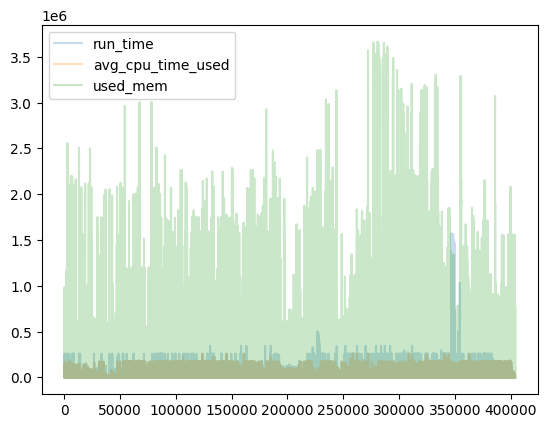

In [16]:
plt.plot(df['run_time'], alpha = 0.25, label = "run_time")
plt.plot(df['avg_cpu_time_used'], alpha = 0.25, label = "avg_cpu_time_used")
plt.plot(df['used_mem'], alpha = 0.25, label = "used_mem")
plt.legend()

In [17]:
for i, value in enumerate(df["avg_cpu_time_used"]):
    if value == -1:
        df["avg_cpu_time_used"][i] = df["avg_cpu_time_used"][i-1]
for i, value in enumerate(df["run_time"]):
    if value == -1:
        df["run_time"][i] = df["run_time"][i-1]

In [18]:
run_time = df["run_time"]
avg_cpu_time_used = df["avg_cpu_time_used"]

run_time = scaler.fit_transform(run_time.values.reshape(-1, 1))
avg_cpu_time_used = scaler.fit_transform(avg_cpu_time_used.values.reshape(-1, 1))

In [19]:
df = {
    "run_time" : run_time.reshape(-1),
    "avg_cpu_time_used" : avg_cpu_time_used.reshape(-1),
    "pred_run" : run_time.reshape(-1)
}

In [20]:
df = pd.DataFrame(df)

In [21]:
df

,run_time,avg_cpu_time_used,pred_run
0,0.087870,0.533600,0.087870
1,0.000007,0.000015,0.000007
2,0.127682,0.000000,0.127682
3,0.125005,0.000000,0.125005
4,0.012387,0.072232,0.012387
...,...,...,...
404171,0.000036,0.000069,0.000036
404172,0.000036,0.000066,0.000036
404173,0.000029,0.000066,0.000029
404174,0.000027,0.000066,0.000027


In [22]:
samples = 10
steps = 1
X = []
Y = []

for i in range(df.shape[0] - samples):
    X.append(df.iloc[i:i+samples, 0:2])
    Y.append(df.iloc[i+samples, 2:])
    
print("Testing data length is: ", len(X[0:1][0]), ': ', X[0:1])
print("Training data length is: ", len(Y[0:1]), ': ', Y[0:1])

Testing data length is:  10 :  [   run_time  avg_cpu_time_used
0  0.087870           0.533600
1  0.000007           0.000015
2  0.127682           0.000000
3  0.125005           0.000000
4  0.012387           0.072232
5  0.000029           0.000012
6  0.000013           0.000000
7  0.125542           0.000000
8  0.125448           0.000000
9  0.125365           0.000000]
Training data length is:  1 :  [pred_run    0.125329
Name: 10, dtype: float64]


In [23]:
X = np.array(X)
Y = np.array(Y)

In [24]:
X, X.shape

(array([[[8.78701420e-02, 5.33599932e-01],
         [6.98051927e-06, 1.54251955e-05],
         [1.27681947e-01, 0.00000000e+00],
         ...,
         [1.25542101e-01, 0.00000000e+00],
         [1.25447546e-01, 0.00000000e+00],
         [1.25365049e-01, 0.00000000e+00]],
 
        [[6.98051927e-06, 1.54251955e-05],
         [1.27681947e-01, 0.00000000e+00],
         [1.25005235e-01, 0.00000000e+00],
         ...,
         [1.25447546e-01, 0.00000000e+00],
         [1.25365049e-01, 0.00000000e+00],
         [1.25328878e-01, 0.00000000e+00]],
 
        [[1.27681947e-01, 0.00000000e+00],
         [1.25005235e-01, 0.00000000e+00],
         [1.23872487e-02, 7.22323343e-02],
         ...,
         [1.25365049e-01, 0.00000000e+00],
         [1.25328878e-01, 0.00000000e+00],
         [1.19297074e-02, 7.01769270e-02]],
 
        ...,
 
        [[1.29139607e-03, 9.64074720e-05],
         [1.29076147e-03, 9.64074720e-05],
         [1.29139607e-03, 1.04120070e-04],
         ...,
         [2.60182

In [25]:
threshold = round(0.998 * X.shape[0])
print('Threshold is', threshold)

Threshold is 403358


In [26]:
trainX, trainY = X[:threshold], Y[:threshold]
testX, testY = X[threshold:], Y[threshold:]

In [27]:
trainX.shape, trainY.shape

((403358, 10, 2), (403358, 1))

In [60]:
model = keras.Sequential()


In [61]:
model.add(layers.LSTM(50,
                      use_bias=True,
                      input_shape=(trainX.shape[1], trainX.shape[2]),
                      return_sequences = True
                      ))

In [62]:
model.add(layers.LSTM(1,
                           use_bias=True,
                           input_shape=(trainX.shape[1], trainX.shape[2])))

In [63]:
model.add(layers.Dropout(rate = 0.2))

In [64]:
model.add(layers.Dense(1))

In [65]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [66]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                      │ (None, 10, 50)                │      10,600 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ lstm_4 (LSTM)                      │ (None, 1)                     │         208 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dropout_1 (Dropout)                │ (None, 1)                     │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_2 (Dense)                    │ (None, 1)                     │           2 │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 10,810 (42.23 KB)

 Trainable params: 10,810 (42.23 KB)

 Non-trainable params: 0 (0.00 B)

In [67]:
history = model.fit(X[:threshold],
                    Y[:threshold],
                    shuffle=False,
                    epochs=7,
                    batch_size=32,
                    validation_split=0.01,
                    verbose=1)

Epoch 1/7
12479/12479 ━━━━━━━━━━━━━━━━━━━━ 206s 16ms/step - loss: 3.5272e-04 - val_loss: 1.9557e-04
Epoch 2/7
12479/12479 ━━━━━━━━━━━━━━━━━━━━ 186s 15ms/step - loss: 3.2041e-04 - val_loss: 1.9292e-04
Epoch 3/7
12479/12479 ━━━━━━━━━━━━━━━━━━━━ 176s 14ms/step - loss: 3.1884e-04 - val_loss: 1.9767e-04
Epoch 4/7
12479/12479 ━━━━━━━━━━━━━━━━━━━━ 172s 14ms/step - loss: 3.1655e-04 - val_loss: 1.9742e-04
Epoch 5/7
12479/12479 ━━━━━━━━━━━━━━━━━━━━ 174s 14ms/step - loss: 3.1652e-04 - val_loss: 1.9618e-04
Epoch 6/7
12479/12479 ━━━━━━━━━━━━━━━━━━━━ 171s 14ms/step - loss: 3.1526e-04 - val_loss: 1.9988e-04
Epoch 7/7
12479/12479 ━━━━━━━━━━━━━━━━━━━━ 1721s 138ms/step - loss: 3.1670e-04 - val_loss: 1.9813e-04


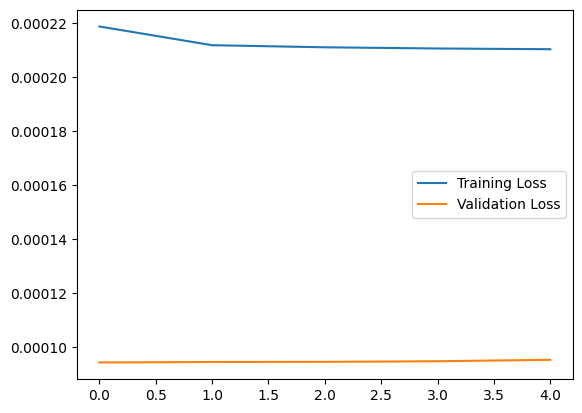

In [36]:
# tr_loss >> val_loss : underfitting
# tr_loss << val_loss : overfitting

plt.plot(history.history["loss"], label = "Training Loss")
plt.plot(history.history["val_loss"], label = "Validation Loss")
plt.legend()

In [37]:
y_pred = model.predict(testX)
y_pred.shape

26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


(808, 1)

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


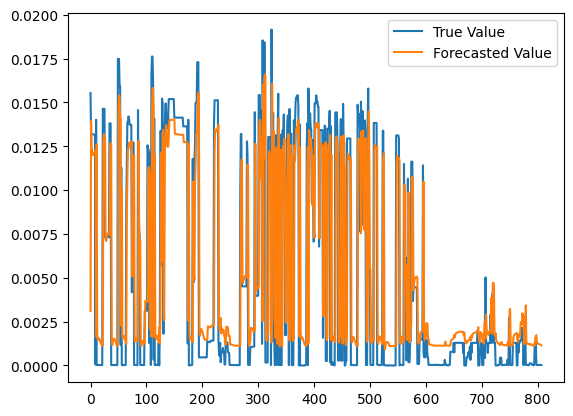

In [38]:
y_pred = model.predict(testX)
plt.plot(testY, label = "True Value")
plt.plot(y_pred, label = "Forecasted Value")
plt.legend()

In [39]:
y_pred = scaler.inverse_transform(y_pred)

In [40]:
testY = scaler.inverse_transform(testY)

In [41]:
rae = 0
for i in range(len(y_pred)):
    abs_val = abs(y_pred[i][0] - testY[i][0])
    rae += abs_val

rae = rae / len(y_pred)

In [42]:
rae

671.6186013758787

In [43]:
testY[1]

array([3416.10167444])

In [44]:
rae * 100

67161.86013758786

In [45]:
from sklearn.metrics import mean_absolute_error

In [46]:
mae = mean_absolute_error(testY, y_pred)

In [47]:
mae

671.6186013758778

In [48]:
final_df = pd.DataFrame({"testY" : testY.reshape(-1),
                        "y_pred" : y_pred.reshape(-1)})

In [49]:
final_df.tail(15),final_df.head(15)

(          testY      y_pred
 793    5.759601  295.198639
 794    4.936801  294.862946
 795  334.879662  294.121033
 796  334.715102  406.970428
 797  334.879662  435.271179
 798    9.050802  448.487640
 799    8.721682  346.527557
 800    6.582401  326.647430
 801    6.582401  320.798126
 802    6.746961  317.628601
 803    9.215362  314.692108
 804    9.379922  312.565155
 805    7.405201  309.826233
 806    7.076081  303.103882
 807    7.076081  297.743164,
           testY       y_pred
 0   4026.783948   806.341858
 1   3416.101674  3613.037109
 2   3416.101674  3233.734131
 3   3416.101674  3145.200684
 4   3416.101674  3110.170898
 5   3416.101674  3116.447754
 6   3416.101674  3131.730713
 7   3416.101674  3149.908203
 8   3416.101674  3168.215820
 9     13.000242  3185.234863
 10  3632.333555   427.041565
 11    11.848322  3266.926514
 12     6.417841   474.556854
 13     6.417841   374.169464
 14     5.759601   398.559479)

In [50]:
final_df.corr()

,testY,y_pred
testY,1.000000,0.711484
y_pred,0.711484,1.000000


<AxesSubplot:>

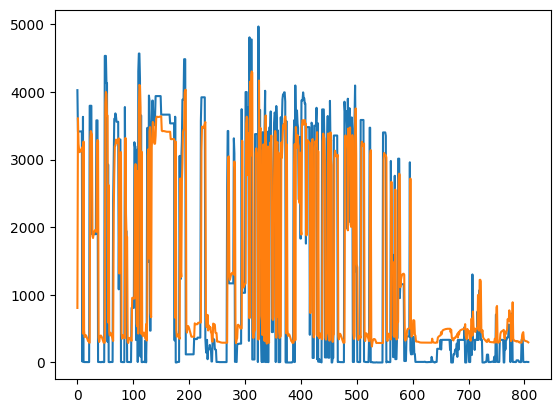

In [51]:
final_df["testY"].plot()
final_df["y_pred"].plot()